# Runge Kutta 4 for Polar Vortex

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [ ]:
Q = H

In [2]:
N = 1000
delta = 0.05

############################ Arrays for storing and initializtion ##########################
x = np.zeros((N,3),float)
y = np.zeros((N,3),float)
dx =np.zeros((3,3),float)
dy = np.zeros((3,3),float)


X = np.zeros((3),float)
Y = np.zeros((3),float)


r = np.zeros((3,3),float)
ux1 = np.zeros((3),float)
uy1 = np.zeros((3),float)

ux2 = np.zeros((3),float)
uy2 = np.zeros((3),float)

ux3 = np.zeros((3),float)
uy3 = np.zeros((3),float)

ux4 = np.zeros((3),float)
uy4 = np.zeros((3),float)

H = np.zeros((N-1),float)
px = np.zeros((N-1),float)
py = np.zeros((N-1),float)
lz = np.zeros((N-1),float)

In [3]:
x[0,0] = -1
y[0,0] = 0
x[0,1] = 1
y[0,1] = 0
x[0,2] = 0
y[0,2] = 1

### Main algorithm

In [4]:
for t in range(1,N):
    for k in range(3):
        ux1[k] = uy1[k] = ux2[k] = uy2[k] = ux3[k] = uy3[k] = ux4[k] = uy4[k]= 0
    for i in range(3):
        lz[t-1] = lz[t-1] - 0.5 * (x[t-1,i] * x[t-1,i] + y[t-1,i] * y[t-1,i])
        px[t-1] = px[t-1] + y[t-1,i]
        py[t-1] = py[t-1] + x[t-1,i]
        for j in range(3):
            if(i != j):
                dx[i,j] = x[t-1,i]-x[t-1,j]
                dy[i,j] = y[t-1,i]-y[t-1,j]
                r[i,j] = np.sqrt(dx[i,j]**2 + dy[i,j]**2)
                H[t-1] = H[t-1] - (1/mt.pi)*np.log(r[i,j])
                
#==========================================================================================                
    for i in range(3):
        for j in range(3):
            if(i != j):
                dx[i,j] = x[t-1,i]-x[t-1,j]
                dy[i,j] = y[t-1,i]-y[t-1,j]
                r[i,j] = np.sqrt(dx[i,j]**2 + dy[i,j]**2)
                ux1[i] = ux1[i] - (1/4*mt.pi)*dy[i,j]/(r[i,j]**2)
                uy1[i] = uy1[i] + (1/4*mt.pi)*dx[i,j]/(r[i,j]**2)
    for l in range(3):
            X[l] = x[t-1,l] + 0.5*delta*ux1[l]
            Y[l] = y[t-1,l] + 0.5*delta*uy1[l]
#============================================================================================            
    for i in range(3):
        for j in range(3):
            if(i != j):
                dx[i,j] = X[i]-X[j]
                dy[i,j] = Y[i]-Y[j]
                r[i,j] = np.sqrt(dx[i,j]**2 + dy[i,j]**2)
                ux2[i] = ux2[i] - (1/4*mt.pi)*dy[i,j]/(r[i,j]**2)
                uy2[i] = uy2[i] + (1/4*mt.pi)*dx[i,j]/(r[i,j]**2)
    for l in range(3):
            X[l] = x[t-1,l] + 0.5*delta*ux2[l]
            Y[l] = y[t-1,l] + 0.5*delta*uy2[l]
            
#=============================================================================================
    for i in range(3):
        for j in range(3):
            if(i != j):
                dx[i,j] = X[i]-X[j]
                dy[i,j] = Y[i]-Y[j]
                r[i,j] = np.sqrt(dx[i,j]**2 + dy[i,j]**2)
                ux3[i] = ux3[i] - (1/4*mt.pi)*dy[i,j]/(r[i,j]**2)
                uy3[i] = uy3[i] + (1/4*mt.pi)*dx[i,j]/(r[i,j]**2)
    for l in range(3):
            X[l] = x[t-1,l] + delta*ux3[l]
            Y[l] = y[t-1,l] + delta*uy3[l]
#==============================================================================================
    for i in range(3):
        for j in range(3):
            if(i != j):
                dx[i,j] = X[i]-X[j]
                dy[i,j] = Y[i]-Y[j]
                r[i,j] = np.sqrt(dx[i,j]**2 + dy[i,j]**2)
                ux4[i] = ux4[i] - (1/4*mt.pi)*dy[i,j]/(r[i,j]**2)
                uy4[i] = uy4[i] + (1/4*mt.pi)*dx[i,j]/(r[i,j]**2)
    for l in range(3):
            x[t,l] = x[t-1,l] + (1/6)*delta*(ux1[l]+2*ux2[l]+2*ux3[l]+ux4[l])
            y[t,l] = y[t-1,l] + (1/6)*delta*(uy1[l]+2*uy2[l]+2*uy3[l]+uy4[l])

### Answers to arrays

In [6]:
x1 = x[:,0]
x2 = x[:,1]
x3 = x[:,2]

y1 = y[:,0]
y2 = y[:,1]
y3 = y[:,2]



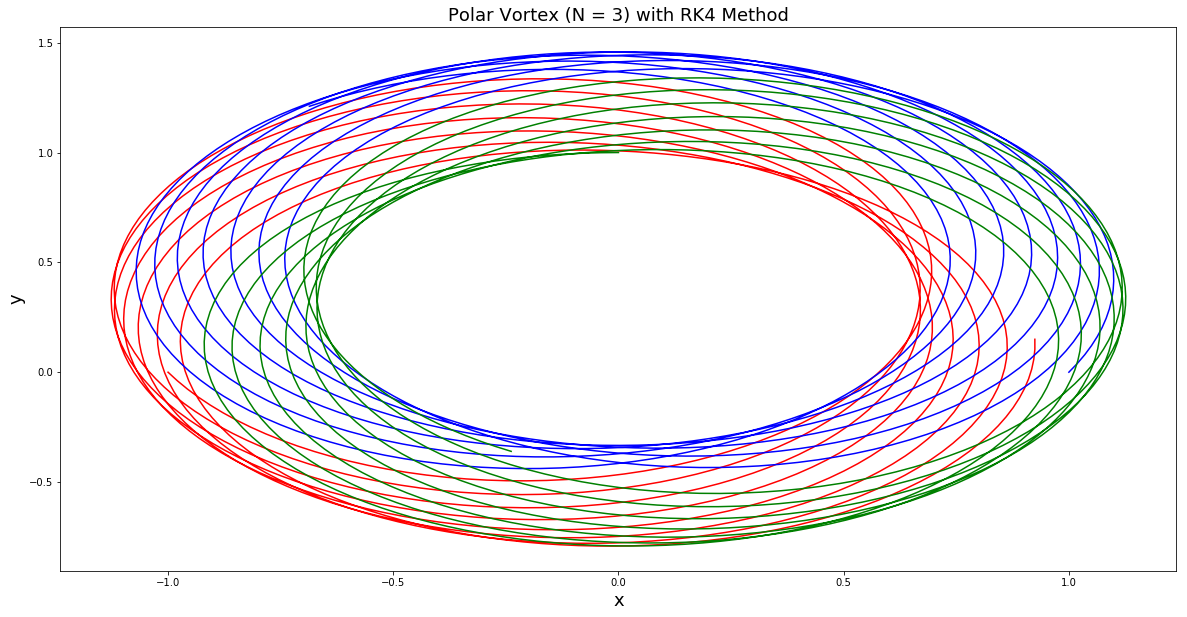

In [8]:
plt.figure(figsize = (20,10))
plt.plot(x1,y1,color = 'red')
plt.plot(x2,y2,color = 'blue')
plt.plot(x3,y3,color = 'green')
plt.title("Polar Vortex (N = 3) with RK4 Method", fontsize = 18)
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.savefig('polar votex-RK4.png')

### Define time and constants

In [9]:
time = np.arange(N-1)

In [10]:
datafile_path = "./H-RK4.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, H)
    
datafile_path = "./L-RK4.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, lz)
    
datafile_path = "./Px-Rk4.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, px)
    
datafile_path = "./Py-Rk4.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, py)

### Plot energies

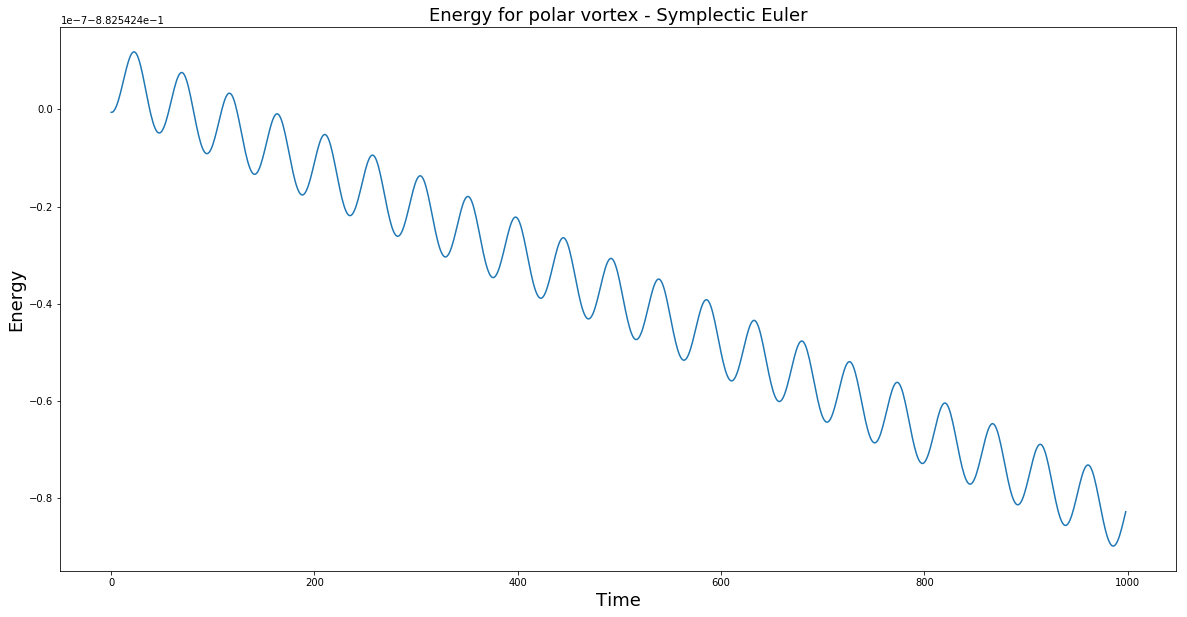

In [11]:
plt.figure(figsize = (20,10))
plt.plot(time,H)
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Energy", fontsize = 18)
plt.title("Energy for polar vortex - Symplectic Euler", fontsize = 18)
plt.savefig("H-RK4.png")